# Derivative of a simple function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# plot graph
import graphviz

def trace(root):
    nodes, edges = set(), set()
    def build(root):
        if root not in nodes:
            nodes.add(root)
        for v in root._children:
            edges.add((v, root))
            build(v)
    build(root)
    return nodes, edges

def draw_graph(root):
    f = graphviz.Digraph(format='svg', graph_attr={'rankdir':"LR"})
    nodes, edges = trace(root)
    for v in nodes:
        f.node(str(id(v)), label="{%s|data %.4f|grad %.4f}" %(v.label, v.data, v.grad) , shape='record')
        if v._op:
            f.node(f'{str(id(v))}_{v._op}', label=f"{v._op}")
            f.edge(f'{str(id(v))}_{v._op}', str(id(v)))
    for v1, v2 in edges:
        f.edge(str(id(v1)), f'{str(id(v2))}_{v2._op}')
    return f

In [3]:
import math

class Value():
    def __init__(self, data, label='', _children=[], _op="", grad = 0):
        self.data = data
        self.label = label
        self._children = set(_children)
        self._op = _op
        self.grad = grad
        self._backward = lambda:None
    def __repr__(self):
        return f"Value({self.label}={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, _children=[self, other], _op="+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, _children=[self, other], _op="*")
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other

    def tanh(self):
        tanh = math.tanh(self.data)
        out = Value(tanh, _children=[self, ], _op="tanh")
        def _backward():
            self.grad += (1 - out.data**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        out = Value(math.exp(self.data), _children=[self, ], _op='exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def __pow__(self, n):
        out = Value(self.data**n, _children=[self, ], _op='pow')
        def _backward():
            self.grad += n * self.data**(n-1) * out.grad
        out._backward = _backward
        return out
    
    def __truediv__(self, other):
        return self * other**(-1)

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for o in v._children:
                    build_topo(o)
                topo.append(v)

        build_topo(self)
        for node in reversed(topo):
            print(node)
            node._backward()

In [24]:
a = Value(2.0, 'a')
b = Value(4.0, 'b')
c = a ** 2; c.label = 'c'
d = b + c; d.label = 'd'
e = Value(3.0, 'e')
L = e / d; L.label = 'L'

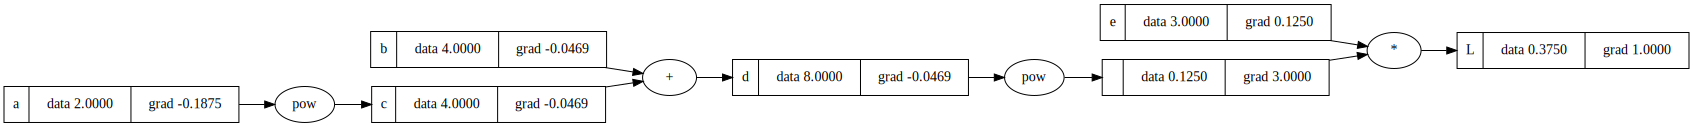

In [27]:
draw_graph(L)

In [26]:
L.grad = 1
L.backward()

Value(L=0.375)
Value(=0.125)
Value(d=8.0)
Value(c=4.0)
Value(a=2.0)
Value(b=4.0)
Value(e=3.0)


In [54]:
import torch

In [55]:
a = torch.Tensor([2.0]).double(); a.requires_grad = True
b = torch.Tensor([4.0]).double(); b.requires_grad = True
c = a**2.0
d = b + c
e = torch.Tensor([3.0]).double(); e.requires_grad = True
L = e/d

In [56]:
L.backward()

In [61]:
a.grad.item(), b.grad.item(), e.grad.item()

(-0.1875, -0.046875, 0.125)

### Convert this file to md

In [7]:
from IPython.core.display import Javascript

In [10]:
%%js
IPython.notebook.kernel.execute('this_notebook = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [11]:
this_notebook

'2022-11-17-implement-the-backward-function-for-each-operation.ipynb'

In [12]:
!jupyter nbconvert --to markdown {this_notebook} --output-dir=../_posts

[NbConvertApp] Converting notebook 2022-11-17-implement-the-backward-function-for-each-operation.ipynb to markdown
[NbConvertApp] Support files will be in 2022-11-17-implement-the-backward-function-for-each-operation_files/
[NbConvertApp] Making directory ../_posts/2022-11-17-implement-the-backward-function-for-each-operation_files
[NbConvertApp] Writing 4377 bytes to ../_posts/2022-11-17-implement-the-backward-function-for-each-operation.md
